In [364]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 17:45:19 2017

@author: matt
"""
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy
#import pyvcf


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from itertools import izip as zip, count # izip for maximum efficiency

rowCount=0
with open('/home/matt/genotype_report_080817.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if rowCount==0:
            alldata = []                                   
            colVals=row
            #find when assays start
            indexAssaystart1=row.index('C__25986767_70')
            #find when SNPs start
            indexSNPstart1=row.index('rs5030865')
            indexAssaystart2=row.index('C__26544178_30')
            indexSNPstart2=row.index('CYP2C19*10/680C>T')
            indexCNVstart=row.index('Hs04502391_cn')
        else:
            alldata.append(row)
        colCount=len(row)
        rowCount=rowCount+1
 

    #sort column values for easy comparison
labelSorted=sorted(colVals)        
diagCodes=np.zeros((rowCount,indexAssaystart1))
genoCodes=np.zeros((rowCount,len(colVals)-indexAssaystart1))
genoCodesCat=np.zeros((rowCount,len(colVals)-indexAssaystart1))

# could fix and make more efficient to fill diagCodes
# diagCodes=[all(tuple) for tuple in zip(*alldata)]

#transpose list to easily access column data   
categoryData=map(list, zip(*alldata))

#get unique elements of each column
els=[]
for test in categoryData:
    els.append(set(test))

rowNum=0
for row in alldata:                    
    colNum=0
    for col in row[0:indexAssaystart1-1]:
        if col=='TRUE':
            diagCodes[rowNum,colNum]=int(col == 'TRUE')
        if colNum==0:
            diagCodes[rowNum,colNum]=col
        colNum=colNum+1
        
    colNum=indexAssaystart1
    for col in row[indexAssaystart1:]:
        if col=='none':
            genoCodes[rowNum,colNum-indexAssaystart1]=0
            genoCodesCat[rowNum,colNum-indexAssaystart1]=0
        else:
            genoCodes[rowNum,colNum-indexAssaystart1]=1
            elnum=1
            for el in els[colNum]:
                if col==el:
                    genoCodesCat[rowNum,colNum-indexAssaystart1]=elnum
                    check=[col=='UND',col=='N/A',col=='INV']
                    for i in check:
                        if i=='TRUE':
                            genoCodesCat[rowNum,colNum-indexAssaystart1]=0
                elnum=elnum+1

        colNum=colNum+1

    rowNum=rowNum+1



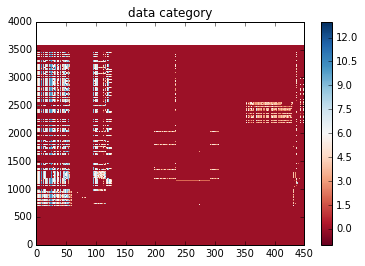

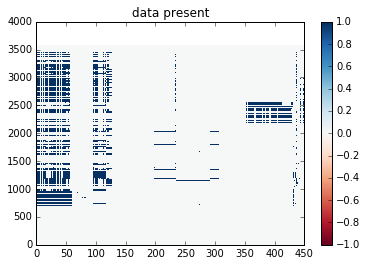

In [365]:
#plot test/patient organization
# y, x = np.mgrid[slice(-3, 3 + dy, dy),slice(-3, 3 + dx, dx)]
plt.pcolor(genoCodesCat, cmap='RdBu', vmin=-1, vmax=genoCodesCat.max())
plt.title('data category')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

plt.pcolor(genoCodes, cmap='RdBu', vmin=-1, vmax=1)
plt.title('data present')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

In [363]:
[col=='UND',col=='N/A',col=='INV'].bool

AttributeError: 'list' object has no attribute 'bool'

In [3]:
#list of geno tests
#1:128 1111:1239 - assays, multiple responses
#139:197 1240-1308 - allele/none
#197:235 more assays 
#235:273 SNPs 1346-
#274 1385: something different. col title '',  results {'1.2', '1.71', '2.11', '2.15', '2.74', 'SRB71', 'none'}
#275:292 more SNPs to 1403
#293:308 15 more assays
#bunch more allele/none
#another chunk of assays
#last 19: CNVs    

# allele=[];
# for i in alldata:
#     allele.append(i[-19])
# print allele

# #groupings found in thermofisher pharmacogenomics guide 

# # 3 versions of same info?
# print els[colVals.index('CYP2C19*2/681G>A')]
# print els[colVals.index('rs4244285')]
# print els[colVals.index('C__25986767_70')]

# #are these different tests? is data same?
# print els[colVals.index('CYP2C19*10/680C>T')]
# print els[colVals.index('CYP2C19*10/c.680C>T')]
# print els[colVals.index('rs6413438')]
# print els[colVals.index('C__30634128_10')]

# #are these different tests? same data?
# print els[colVals.index('CYP2C19*17/-806C>T')]
# print els[colVals.index('CYP2C19*17/g.-806C>T')]

# print els[colVals.index('C_11711720D_40')]
# print els[colVals.index('C_11711720C_30')]

# print els[colVals.index('C__25625804_10')]
# print els[colVals.index('C_25625804D_20')]

# print els[colVals.index('rs5030865')]
# print els[colVals.index('C_30634117C_K0')]
# print els[colVals.index('C_30634117D_M0')]



In [344]:
#which patients have different geno tests?
dataPresent= np.where(genoCodesCat[:]==1)
#the ones that have any tests done
usegenoPts=set(dataPresent[0])
#the tests that have any patient data
usegenoCodes=set(dataPresent[1])
usegenoCodes=[val for val in usegenoCodes]

#which patients have diagnoses?
dataPresent= np.where(diagCodes[:]==1)
#the ones that have any diagnoses
usediagPts=set(dataPresent[0])
#the diagnoses that have any patients
usediagCodes=set(dataPresent[1])
usediagCodes=[val for val in usediagCodes]

#overlap between patients that have both any geno testing and any diagnosis 
overlapPts = [val for val in usegenoPts if val in usediagPts]

# #last patient in this overlap set seems to have most tests done
# lastPt=overlapPts[len(overlapPts)-1]
# inds=np.where(genoCodes[lastPt])
# usegenoCodes_most=[val for val in inds[0]]
# usegenoCodes_most=usegenoCodes[]

useRows=overlapPts
data=genoCodes

#slow for large data >1000 of rows*cols
# set the limits of the plot to the limits of the data

# y, x = np.mgrid[0:len(useRows),0:len(usegenoCodes)]
#how many patients per genotest?
histTestsperPatient=sum(np.transpose(genoCodes[overlapPts]))
#how many geno tests per patient?
histPatientsperTest=sum(genoCodes[overlapPts])
testIndex=sorted(range(len(histTestsperPatient)), key=histTestsperPatient.__getitem__)

numPts=[]
for num in range(0,len(histPatientsperTest)):
    numPts.append(len(np.where(histTestsperPatient==num)[0]))

testn=0
for n in numPts:
    if n==max(numPts):
        numTestsmax=testn
    testn=testn+1
#65 tests run in 672 patients
    
print [max(numPts),'patients with',numTestsmax,'genetic tests performed']

usePt=[]
useTests=[]
ptind=0
testhist
for pt in histTestsperPatient:
    if pt==numTestsmax:
        usePt.append(overlapPts[ptind])
        testsDone=np.argwhere(genoCodes[overlapPts[ptind-1]])
        for t in testsDone:
            useTests.append(t[0])
            testhist[t[0]]=testhist[t[0]]+1
    ptind=ptind+1
    

TypeError: object of type 'int' has no len()

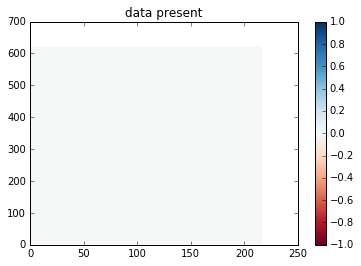

In [345]:

useTests_unique=[]
for i in set(useTests):
    useTests_unique.append(i)

useTests_names=[]
for i in useTests_unique:
    useTests_names.append(colVals[i+indexAssaystart1])

genoCodes_use=[];
for i in genoCodes[usePt]:
    genoCodes_use.append(i[useTests_unique])
    
plt.pcolor(genoCodes_use, cmap='RdBu', vmin=-1, vmax=1)
plt.title('data present')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

In [197]:
testn

450

In [ ]:
#check if CYP/rs/C_ data compare as expected
concatTests = [categoryData[colVals.index('CYP2C19*2/681G>A')],categoryData[colVals.index('rs4244285')],categoryData[colVals.index('C__25986767_70')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts=[];
ptNum=0;
#check in CYP test: most limited data there
for pt in concatTests[0]:
    if pt=='A/G':
        checkPts.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
print checkPts
#not validated but not disproven

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
#when both tested, they match

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1

In [112]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
# from sklearn.datasets import load_boston
# boston = load_boston()
rf = RandomForestRegressor()
# rf.fit(boston.data[:300], boston.target[:300])
rf.fit(genoCodes[overlapPts],diagCodes[overlapPts])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
instances = genoCodes[[overlapPts[0],overlapPts[1]]].reshape()
print "Instance 0 prediction:", rf.predict(instances[0])
# print "Instance 1 prediction:", rf.predict(instances[1])

TypeError: function takes exactly 1 argument (0 given)

[]


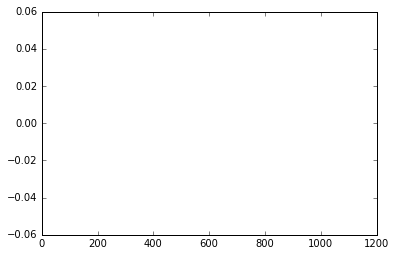

In [343]:
#looking at diagnosis codes

commonCodes=[]
commonCodeinds=np.where(sum(diagCodes)>50)[0]
commonCodeinds_sorted=sorted(range(len(commonCodeinds)), key=sum(diagCodes)[commonCodeinds].__getitem__)
for i in commonCodeinds_sorted:
    commonCodes.append(colVals[commonCodeinds[i]])
print commonCodes
plt.pcolor(diagCodes[commonCodeinds[commonCodeinds_sorted]])
plt.show()
# sum(diagCodes)[commonCodeinds[commonCodeinds_sorted]]

In [366]:
sum(diagCodes)[0:10]

array([   0.,    0.,    0.,    0.,    0.,  328.,  269.,    1.,   97.,    6.])

In [377]:
colVals

['organization',
 'dv58p61',
 'd286p3',
 'd995p20',
 'dOther1',
 'I10',
 '',
 'M25.579',
 'E11.9',
 'J45.909',
 'E03.9',
 'E78.5',
 'F32.9',
 'E29.1',
 'N40.0',
 'F11.20',
 'M51.36',
 'E78.4',
 'I82.401',
 'E66.9',
 'F51.01',
 'G82.20',
 'K21.0',
 'Q74.3',
 'K76.0',
 'G45.9',
 'G20',
 'I65.22',
 'F41.1',
 'F32.1',
 'E78.89',
 'M54.41',
 'M54.5',
 'M15.9',
 'Z83.2',
 'E83.118',
 'M1A.0790',
 'N18.2',
 'F33.41',
 'G50.0',
 'M81.0',
 'I48.0',
 'M12.9',
 'F41.9',
 'N52.8',
 'I70.0',
 'M54.32',
 'M51.37',
 'G60.9',
 'E11.42',
 'M17.12',
 'M89.8X0',
 'M47.814',
 'B91',
 'M54.17',
 'M79.7',
 'M54.12',
 'G14',
 'M47.817',
 'G89.4',
 'M47.27',
 'F31.75',
 'E11.40',
 'G60.3',
 'I48.91',
 'B02.23',
 'I42.8',
 'N52.31',
 'C61',
 'I25.10',
 'C54.2',
 'M25.569',
 'M25.572',
 'M32.9',
 'M54.2',
 'G43.909',
 'I25.84',
 'R73.01',
 'F17.200',
 'M19.90',
 'M35.3',
 'M25.552',
 'F43.20',
 'Z82.49',
 'M31.0',
 'K52.89',
 'K22.70',
 'G25.81',
 'E03.8',
 'G47.09',
 'M19.041',
 'M19.042',
 'M15.0',
 'N04.9',


In [379]:
colVals[1111:]

['C__25986767_70',
 'C__27861809_10',
 'C__30634136_10',
 'C__27531918_10',
 'C__30634127_10',
 'C__30634130_30',
 'C__25745302_30',
 'C_30634128A_60',
 'C____469857_10',
 'C__25625805_10',
 'C__27104892_10',
 'AHKAXN4',
 'C__27859817_40',
 'C__32287221_20',
 'C__25625804_10',
 'C_25625804D_20',
 'C__30634132_70',
 'C__30634204_10',
 'C__27535825_20',
 'C__30634202_10',
 'C__27859822_10',
 'C___8303531_40',
 'C__30633862_10',
 'C__26201809_30',
 'C__30633871_50',
 'C__30203950_10',
 'C__32287188_10',
 'C__30633872_10',
 'C__30633863_10',
 'C__27102425_10',
 'C__27102414_10',
 'C__32407232_50',
 'C__27102431_D0',
 'C__32407243_20',
 'C_30634117C_20',
 'C_30634117D_30',
 'C__32407229_60',
 'C__11484460_40',
 'C__27531552_A0',
 'C___2222771_40',
 'C__34816113_20',
 'C__34816116_20',
 'C___1901697_20',
 'C__30633906_10',
 'C__15859191_30',
 'C__16017734_10',
 'C___8881221_40',
 'C__30634146_10',
 'C___1642455_10',
 'C__60142977_10',
 'C___1202883_20',
 'C____850486_20',
 'C___8726802_20',
